# *Notebook Name*

## Libraries and Configurations

Import configuration files

In [88]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

Import **data libraries**

In [89]:
import pandas as pd

Import **ML libraries**

In [90]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Import **other libraries**

In [91]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x10480c590>>

Custom helper scripts

In [92]:
%cd ..
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning

/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks
/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks/data_exploration_cleaning


/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Data

In [93]:
# Combined dataframe
fsct_df_csv = config["DEFAULT"]["interim_path"] + "combined_df_balanced_fsct.csv"

In [94]:
fsct_df = pd.read_csv(fsct_df_csv, index_col=0)

In [95]:
fsct_df

,MAC Address,FSCT-1,FSCT-2,FSCT-3,FSCT-4,FSCT-5,FSCT-6,FSCT-7,FSCT-8,FSCT-9,FSCT-10,FSCT-11,FSCT-12,FSCT-13,Label
0,00:0f:00:6a:68:8b,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,SamsungJ6_K
1,00:be:3b:a2:a8:56,0.000000,0.043550,0.090959,29.715403,0.178241,0.222561,0.267727,29.892387,0.355262,0.399559,0.444297,0.488570,0.533296,HuaweiP20_G
2,02:00:00:00:00:00,0.000000,0.112811,0.152743,0.265630,7251.903858,0.381197,4046.760916,0.534422,0.618308,0.763675,0.839614,0.915742,0.993008,SamsungM31_A
3,02:00:00:00:3e:b2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,iPhone11_C
4,02:00:3a:5e:a1:f4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,iPhone11_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,fe:f9:ac:47:0d:b7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,iPhone12_W
4411,fe:f9:fc:fb:83:9e,0.337505,1.000000,1.000000,0.483576,0.505750,0.000000,0.043133,0.084950,0.126696,0.190064,0.211886,0.274438,0.296181,iPhone6_N
4412,fe:fc:07:34:10:69,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,iPhone11_C
4413,fe:fc:aa:d1:89:d1,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,iPhone12_W


## Principal Component Analysis

Dropping non-numerical values for the transform

In [96]:
fsct_numerical = fsct_df.drop(columns=["MAC Address", "Label"])

Standardizing features

In [97]:
scaler = StandardScaler()
fsct_scaled = scaler.fit_transform(fsct_numerical)

Principal Component Analysis

In [98]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(fsct_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

Adding the label

In [99]:
df_final = pd.concat([df_pca, fsct_df["Label"]], axis=1)

In [100]:
df_final

,PC1,PC2,Label
0,0.848504,-0.172266,SamsungJ6_K
1,-2.508650,0.549804,HuaweiP20_G
2,4.418541,65.279843,SamsungM31_A
3,0.140819,-0.057939,iPhone11_C
4,0.749556,-0.198192,iPhone11_B
...,...,...,...
4410,0.140819,-0.057939,iPhone12_W
4411,-1.716281,0.048322,iPhone6_N
4412,0.173744,-0.081391,iPhone11_C
4413,0.121681,-0.107338,iPhone12_W


In [101]:
# remove pca1 outliers
df_final = df_final[df_final["PC1"] < 10]
df_final = df_final[df_final["PC2"] < 1]

/var/folders/kz/mqbx964j4w53vxgzd7rlzx380000gn/T/ipykernel_5978/711749499.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


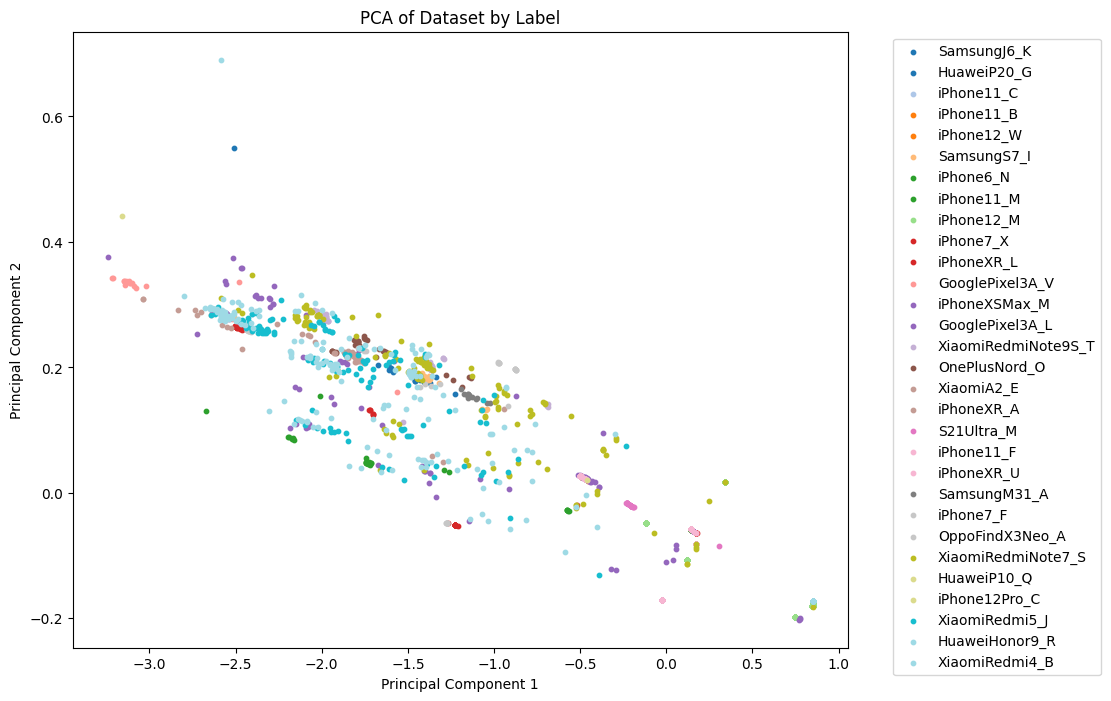

In [108]:
import matplotlib.pyplot as plt

# Assuming df_final contains the principal components and the 'Label' column
# For example, df_final = pd.concat([df_pca, df['Label']], axis=1)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Generate a colormap and create a color array
unique_labels = df_final["Label"].unique()
colors = plt.cm.get_cmap("tab20", len(unique_labels))
label_color_map = {label: colors(i) for i, label in enumerate(unique_labels)}

# Plot each label with its corresponding color
for label in unique_labels:
    subset = df_final[df_final["Label"] == label]
    plt.scatter(
        subset["PC1"], subset["PC2"], s=10, color=label_color_map[label], label=label
    )

# Add legend and labels
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Dataset by Label")

# Show the plot
plt.show()